# Анализ данных осень 2021
# Работа с изображениями

## План лекции

- Знакомство с библиотеками по работе с изображениям
- Примеры алгоритмов компьютерного зрения
- Нейросетевые подходы
- Эмбеддинг изображения
- Польза в анализе данных

## Установка библиотек

Метод установки `opencv` и `pytorch` зависит от операционной системы. Лучше найти метод для установки на свою систему

Установка [pytorch](https://pytorch.org/)

In [1]:
# Через pip
! pip3 install opencv-python
! pip3 install opencv-python-contrib

!pip3 install torch==1.10.0
!pip3 install torchvision==0.11.1

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'D:\\study\\5sem\\DA\\lab6\\venv\\Lib\\site-packages\\cv2\\cv2.cp39-win_amd64.pyd'
Check the permissions.




  Using cached opencv_python-4.5.4.60-cp39-cp39-win_amd64.whl (35.1 MB)


ERROR: Could not find a version that satisfies the requirement opencv-python-contrib (from versions: none)
ERROR: No matching distribution found for opencv-python-contrib


In [2]:
from platform import python_version
import cv2
import torch
import torchvision

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
print(f'Opencv version: {cv2.__version__}. \
        \nPython version: {python_version()}. \
        \nTorch version: {torch.__version__} \
        \nTorchvision version: {torchvision.__version__}')

Opencv version: 4.5.4.         
Python version: 3.9.7.         
Torch version: 1.10.0+cpu         
Torchvision version: 0.11.1+cpu


## Классическое компьютерное зрение

### Лена

В 1973 году Александру Савчуку из Университета Южной Калифорнии для иллюстрации статьи на тему обработки изображений понадобился фотопортрет с хорошим динамическим диапазоном. Савчук отсканировал фрагмент постера из Playboy.

[wiki про Лену](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B0_(%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5)) и [кое-что ещё](http://lenna.org/)

In [4]:
!curl http://optipng.sourceforge.net/pngtech/img/lena.png --output pics/lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file pics/lena.png: No such file or directory

  2  462k    2 13234    0     0  13234      0  0:00:35 --:--:--  0:00:35 15406
curl: (23) Failed writing body (0 != 13234)


### Чтение картинок

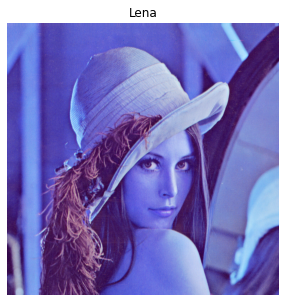

In [4]:
img = cv2.imread('lena.png')  # Загрузка/чтение изображения

plt.figure(figsize=(15, 5))
plt.title('Lena')
plt.imshow(img)
plt.axis('off')
plt.show()

# Исторически сложилось так, что OpenCV  работает с изображениями 
# в формате BGR

## Обработка картинок

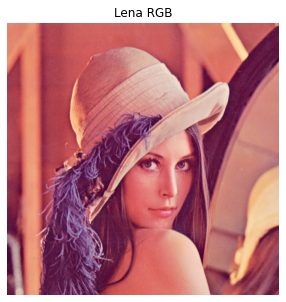

In [5]:
# Контвертируем изображение в нужный формат
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
# "BGR2RGB" -> "Blue Green Red to Red Green Blue"

plt.figure(figsize=(15, 5))
plt.title('Lena RGB')
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [6]:
# Так же OpenCV имеет свою функцию для показа изображения (в отдельном окне)
cv2.imshow('Image Title', img)  # Создаем окно для показа изображения
cv2.waitKey(0)  # Ждем нажатия любой клавиши для закрытия окно=а
cv2.destroyWindow('Image Title')  # Удаляем окно с именем 'Image Title'

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Image Title' in function 'cvDestroyWindow'


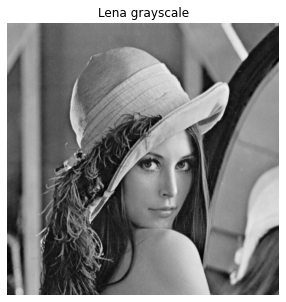

In [7]:
# Мы также может перевести изображение в "grayscale" формат
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale')
plt.imshow(img_gray, cmap='gray')
plt.axis('off');

In [8]:
# Форматы
is_color_format = lambda var: var.startswith('COLOR_')
list(filter(is_color_format, dir(cv2)))

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

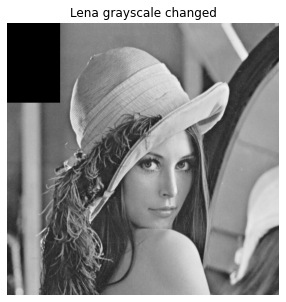

In [9]:
# Возможно итерироваться по пикселям изображения
img_gray_copy = img_gray.copy()

for i in range(img_gray_copy.shape[0]):  # По строкам
    for j in range(img_gray_copy.shape[1]): # По столбцам
        if i < 150 and j < 100:
            img_gray_copy[i, j] = 0

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale changed')
plt.imshow(img_gray_copy, cmap='gray')
plt.axis('off');

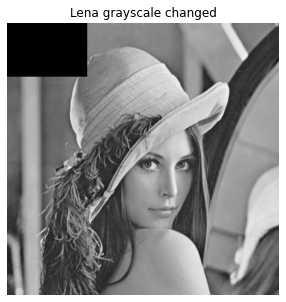

In [10]:
# Однако, OpenCV имеет функционал чтобы сделать тоже самое что в ячейке ранее
img_gray_copy = img_gray.copy()

img_gray_copy = cv2.rectangle(img_gray_copy, (0, 0), (150, 100), color=0, thickness=-1)

plt.figure(figsize=(15, 5))
plt.title('Lena grayscale changed')
plt.imshow(img_gray_copy, cmap='gray')
plt.axis('off');

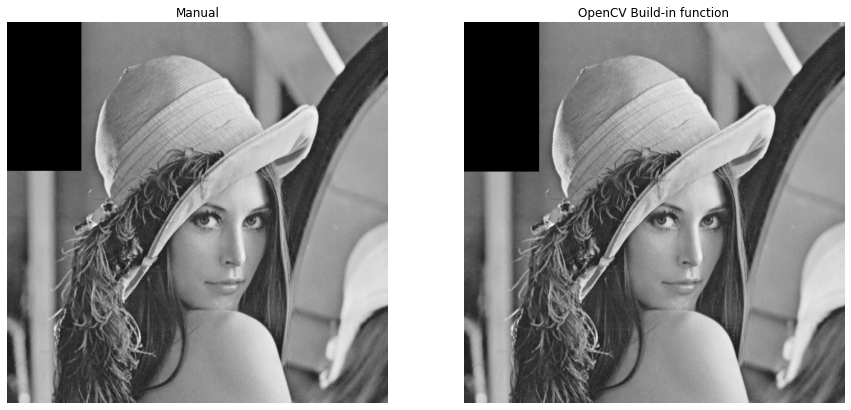

In [11]:
# Про порядок указания координат в OpenCV
#
# OpenCV определяет порядок указания осей в своих функциях: (x, y)
# хотя при ручном итерировании оси идут в порядоке "строка-стобец" (y, x) 


img_gray_copy_1 = img_gray.copy()

x_threshold = 100
y_threshold = 200

for y in range(img_gray_copy_1.shape[0]):  # строка
    for x in range(img_gray_copy_1.shape[1]):  # столбец
        if x < x_threshold and y < y_threshold:
            img_gray_copy_1[y, x] = 0
            

img_gray_copy_2 = img_gray.copy()
pt1 = (0, 0)
pt = (x_threshold, y_threshold)  # ВАЖНО !! Не (y, x), а (x, y) !!

# Рисование прямоугольника на изображении
img_gray_copy_2 = cv2.rectangle(img_gray_copy_2, 
                                pt1=(0, 0), 
                                pt2=(x_threshold, y_threshold), 
                                color=0, 
                                thickness=-1)  
# thickness == -1 => Закрасить фигуру (в данном случае прямоугольник)


plt.figure(figsize=(15, 10))
ax = plt.subplot(121)
ax.set_title('Manual')
ax.imshow(img_gray_copy_1, cmap='gray')
ax.axis('off')

ax = plt.subplot(122)
ax.set_title('OpenCV Build-in function')
ax.imshow(img_gray_copy_2, cmap='gray')
ax.axis('off');

### Алгоритмы

Так же в OpenCV есть реализации базовых алгоритмов компьютерного зрения

   - Edge Detection (Canny Filter)
   - Line Detection (Hough Lines)
   - Circles Detection (Hough Circles)

#### Отступление про классические алгоритмы 

Они опираются на матричные операторы. С их помощью сворачивают исходную картинку

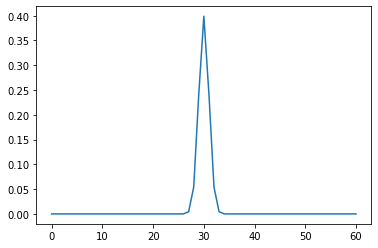

In [12]:
# Например фильтр гаусса

from math import pi, sqrt, exp

def gauss(n: int, sigma: int = 1):
    gauss_f = lambda x : 1 / (sigma * sqrt(2*pi)) * exp(-float(x)**2/(2*sigma**2))
    
    return [gauss_f(x) for x in range(-n//2, n//2 + 1)]

plt.plot(gauss(n=60, sigma=1))

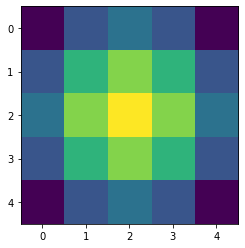

In [13]:
# 2d фильтр

def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    # mx, my - mean for x y
    # sx, sy - size for x y
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(-1, 1, num=5)
y = np.linspace(-1, 1, num=5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
gaus_filter = gaus2d(x, y)

plt.imshow(gaus_filter)
plt.show()

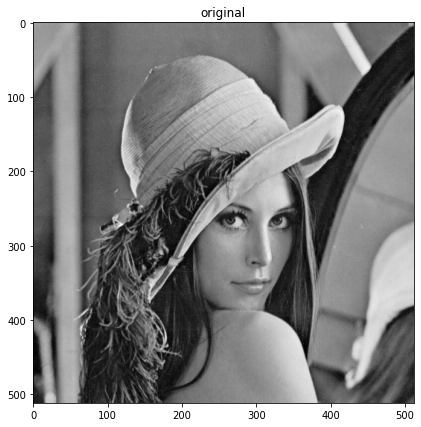

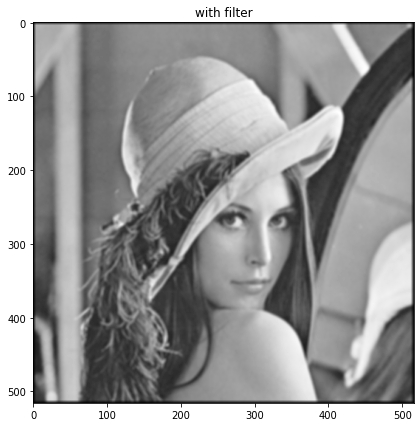

In [14]:
# Применим к Лене
from scipy.signal import convolve2d


img = cv2.cvtColor(cv2.imread('lena.png'), cv2.COLOR_BGR2GRAY)
convolved = convolve2d(img, gaus_filter)

# original
plt.figure(figsize=(7, 7))
plt.title('original')
plt.imshow(img, cmap='gray')
plt.show()

# with filter
plt.figure(figsize=(7, 7))
plt.imshow(convolved, cmap='gray')
plt.title('with filter')
plt.show()

#### Edge detection (Canny)

Подробнее в [доке](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html)

In [ ]:
# Использует фильтр Собеля
plt.imshow(cv2.imread('pics/sobel.png'))

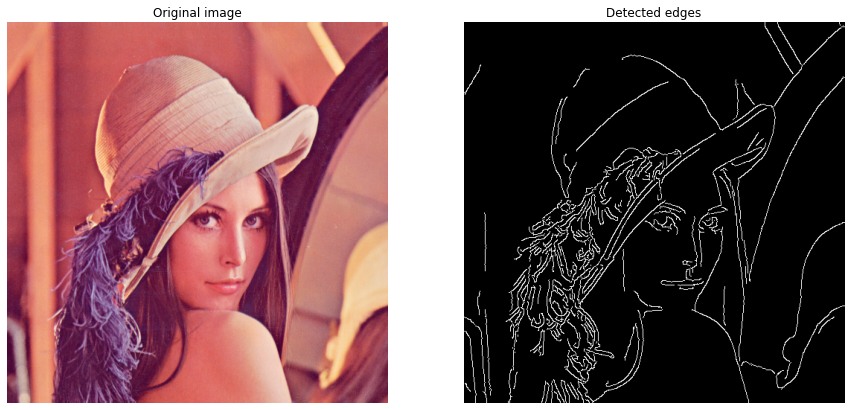

In [15]:
# Суть в поиске границ. Для этого:
# 1. убирается шум
# 2. берётся градиент по интенсивности изображения
img_gray_copy = cv2.blur(img_gray, ksize=(5, 5))

edges = cv2.Canny(
    image=img_gray_copy,
    threshold1=50,
    threshold2=100
)

plt.figure(figsize=(15, 10))

ax = plt.subplot(121)
ax.set_title('Original image')
ax.axis('off')
ax.imshow(img_rgb)

ax = plt.subplot(122)
ax.set_title('Detected edges')
ax.axis('off')
ax.imshow(edges, cmap='gray');

Зачем нужны алгоритмы классического CV?

Они решают задачи:
- Предобработки изображения
- Мало тренировочных данных (Недостаточно для нейросетей)
- Нужно робастное решение

## Пример решения задачи классическим CV

**Дисклеймер** 

Код не претендует на оптимальность алгоритма и красоту. Его задача - пошагово показать решение задачи с помощью выбранных алгоритмов. 

author: *Байкалов Владимир*

In [ ]:
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread('pics/trains/all.jpg'))

In [ ]:
import os
import cv2
import copy
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from typing import List, Tuple

DATA_DIR = './pics/trains/'

TRAIN_LEN = 120  # Примерная длина паровозика
TRAIN_AREA = 1500  # Примерная прощадь паровозика

# Константы для создания графа
MAX_DISTANCE_BETWEEN_TRAINSDISTANCE = int(TRAIN_LEN / 2) 
MAX_DISTANCE_BETWEEN_POINTS = 1.8 * TRAIN_LEN

# Цветовые константы
GREEN_LOWER = np.array([63, 124, 56])
GREEN_UPPER = np.array([94, 243, 132])

# Создание примитивов (шаблонов) для использование алгоритма "Template matching"
# Source: https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html
img_with_city_templates = cv2.imread(DATA_DIR + 'red_green_blue_inaccurate.jpg')
city_template = img_with_city_templates[255:280, 675:700]

plt.imshow(cv2.cvtColor(city_template, cv2.COLOR_BGR2RGB))

### Вспомогательные функции

In [ ]:
from trains_detection import get_template_matchings, process_trains


def predict_image(img: np.ndarray, filename: str):
    """
    Функция детектирующая все дорожки из поездов
    
    img: Исходное изображение
    """
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Переведём изображение в формат HSV для дальнейшей фильтрации по цвету
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Находим города на картинке
    center_points = get_template_matchings(img, city_template, 0.8)
    
    # Находим цвета на картинке
    additional_lines, edges_info, new_centers, train_numbers = process_trains(
        img,
        img_hsv,
        GREEN_LOWER,
        GREEN_UPPER,
        center_points
    )
    
    # Рисуем ребра
    for (fst, snd) in additional_lines:
        cv2.line(img_rgb, pt1=fst, pt2=snd, color=(0, 255, 0), thickness=10)
    for (fst, snd, _) in edges_info:
        cv2.line(img_rgb, pt1=fst, pt2=snd, color=(0, 255, 0), thickness=10)
    
    # Рисуем города
    for center_point in center_points:
        cv2.circle(img_rgb, center=center_point, radius=30, color=(255, 255, 0), thickness=-1)
    for center_point in new_centers:
        cv2.circle(img_rgb, center=center_point, radius=30, color=(255, 255, 0), thickness=-1)

    print(f'There are {train_numbers} green trains on pic {filename}')
    
    plt.figure(figsize=(15, 10))
    plt.imshow(img_rgb)
    plt.show()

### Запуск алгоритма

In [ ]:
DATA_DIR = './pics/trains/'


for filename in os.listdir(DATA_DIR):
    img = cv2.imread(os.path.join(DATA_DIR, filename))
    predict_image(img, filename)

Как видно, один город не был опознан. Возможно потому что он находится на сгибе карты. Эту проблему можно решить следующими способами:

- Добавить ещё один шаблон для поиска городов (не очень робастно)
- Уменьшить порог фильтрации похожих точек (есть шанс появление шума)
- Иначе обрабатывать граф (немного сложнее чем предыдушие варианты)

В качестве упражнения, можно попробовать задетектить паровозики других цветов. 

Начните с синих или жёлтых. При детекции других цветов обратите внимание, что на карте существуют дорожки схожих цветов, но со специальными метками. Для них вам придется сделать дополнительную фильтрацию с использованием Template Matching'a

## Нейросетевое компьютерное зрение

### Использование пред-обученных моделей в задаче классификации чисел 

(CIFAR + Transfer learning)

**Идея**: В библиотеках машинного обучения довольно существуют целые "зоопарки" (*model zoo*) из пред-обученных моделей. Эти модели можно до-обучить (*fine-tune*) для решения другой задачи.


Описаный подход называется **"Transfer learning"**, так как знания обученной нейронной сети транслируются на другую задачу из схожей области.

[Ссылка](https://pytorch.org/serve/model_zoo.html) на подобный "зоопарк"

In [16]:
import random
import numpy as np

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.models import resnet50

from tqdm.notebook import tqdm, trange

# Фиксируем random seed для воспроизводимости результатов
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True


OUTPUT_DIM = 10  # Количество классов
EPOCH_NUM = 4  # Сколько эпох будет обучать модель

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
basic_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()
])  # Базовые аугментации для тренировочных данных (грубо говоря бесплатное увеличение тренировочной выборки)

In [18]:
# Загрузим данные

train_dataset = CIFAR10(
    root='./CIFAR/train',
    train=True, 
    transform=basic_transform,
    download=True
)

test_dataset = CIFAR10(
    root='./CIFAR/test',
    train=False, 
    transform=transforms.ToTensor(),  # Для тестовых данные НЕ НАДО использовать нгикакие аугментации
    download=True
)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)>

In [27]:
# Создадим DataLoader'ы (для того чтобы было проще итерироваться)

dataloaders = {
    'train': DataLoader(
        dataset=train_dataset,
        batch_size=128, 
        shuffle=True
    ),
    'val': DataLoader(
        dataset=test_dataset,
        batch_size=128, 
        shuffle=False
    )
}

NameError: name 'train_dataset' is not defined

In [ ]:
# Создадим класс нашей модели

# Так как мы хотим использовать все фишки библиотеки Pytorch важно наследоваться от nn.Module
class CifarClassifier(nn.Module):
    def __init__(self, ouput_dim):
        super(CifarClassifier, self).__init__()  # "Регистрируем" создаваемый объект как нейросетевую модель
        self.model = resnet50(pretrained=True)  # Скачиваем пред-обученную основу для нашей модели
        
        # "Замораживаем" все веса для ускорения обучения (мы считаем что они уже хорошо обучены)
        for param in self.model.parameters():
            param.requires_grad = False
        
        # Создаем "голову" которую мы и будем обучать
        self.fc1 = nn.Sequential(
            nn.Linear(1000, 64),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.25),
            nn.Linear(64, ouput_dim)
        )
    
    def embed(self, x):
        return self.fc1(self.model(x))
    
    # Описываем как именно наша модель будет генерировать предсказания
    def forward(self, x):
        resnet_out = self.embed(x)
        return self.fc2(resnet_out)

In [ ]:
model = CifarClassifier(OUTPUT_DIM)
model = model.to(DEVICE)  # Переносим модель на GPU

In [ ]:
# Создаем функцию ошибки (так как задача многоклассовой классификации, то используем кросс-энтропию)
# Более подробно об этом будет в курсе машинного обучения
loss_function = torch.nn.CrossEntropyLoss()

# Регистрируем для нашей модели способ изменения её весов
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=1e-4)

In [ ]:
loss_hist = {'train': [], 'val': []}
acc_hist = {'train': [], 'val': []}

# Важно! В данном примере точность используется для упрощения.
# Никогда не используйте её если у вас несбалансированная выборка
# Возьмите лучше F_score или ROC_AUC (об этом вам потом расскажут)

# Основной алгоритм обучения
for epoch in trange(EPOCH_NUM, desc='Whole pipeline'):
    
    for phase in ['train', 'val']:
        dataloader = dataloaders[phase]
        
        # Это условие необходимо так как у нас есть слой DropOut
        # И на валидации его принято фиксировать
        if phase == 'train':
            model.train() 
        elif phase == 'val':
            model.eval()
        
        running_loss = 0.
        running_acc = 0.
        
        # Проходимся по набору данных
        for (X_batch, y_batch) in tqdm(dataloader, desc=f'Epoch: {epoch + 1}. Phase: {phase}'):
            # Нормализуем наши данные
            X_batch = X_batch / 255
            X_batch = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(X_batch)
            
            # Переносим на устройство
            X_batch = X_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            
            # Для корректного обучения перед каждым шагом необходимо сбрасывать прошлые ошибки
            optimizer.zero_grad()
            
            with torch.set_grad_enabled(phase == 'train'):
                y_pred = model(X_batch)
                
                loss_value = loss_function(y_pred, y_batch)
                y_pred_class = y_pred.argmax(dim=1)
                
                # На обучении мы хотим учиться в зависимости от ошибки
                if phase == 'train':
                    loss_value.backward()
                    optimizer.step()
                   
            # Аггрегируем ошибку и точность
            running_loss += loss_value.item()
            running_acc += (y_pred_class == y_batch.data).float().mean().data.cpu().numpy()
        
        epoch_loss = running_loss / len(dataloader)
        epoch_acc = running_acc / len(dataloader)
        
        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f} ', end='')
        
        loss_hist[phase].append(epoch_loss)
        acc_hist[phase].append(epoch_acc)

### Нарисуем график ошибок во время тренировки

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc_hist.keys():
    plt.plot(acc_hist[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15)
plt.grid(linestyle='--', linewidth=0.5, color='.7')
plt.show()

plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in loss_hist.keys():
    plt.plot(loss_hist[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Loss')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Loss function value', fontsize=15)
plt.grid(linestyle='--', linewidth=0.5, color='.7')
plt.show()

### эмбеддинги картинок

In [ ]:
img = train_dataset[0][0].detach().numpy()

plt.imshow(np.transpose(img, (1,2,0)))

In [31]:
bs = ['a', 'b', 'c']
cs = [1, 2, 3]

def f(a,b,c) -> int:
    return a + b + c

a = [1,2,3]
f(*a)

6

In [ ]:
train_items = [train_dataset[i] for i in range(1000)]
xs, ys = zip(*train_items)

xs = torch.stack(xs)
xs = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(xs)
xs.size()

In [ ]:
embs = model.model(xs)
embs.size()

In [ ]:
import umap

In [ ]:
points = umap.UMAP().fit_transform(embs.detach().numpy())
points.shape

In [ ]:
xs.size()

In [ ]:
from tensorboardX import SummaryWriter

writer = SummaryWriter()

In [ ]:
# log embeddings
features = xs.mean(dim=1).view(-1, 32 * 32)
writer.add_embedding(features,
                     metadata=ys,
                     label_img=xs)
writer.close()